In [1]:
#importing the libraries
import torch
from torch.utils.data import Dataset,DataLoader
import os
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
#Creating the custom dataset class
class MyDataset(Dataset):
    def __init__(self,root): #Initializer
        super().__init__()
        self.filenames = [os.path.join(root, x) for x in os.listdir(root)]
        #Augmenting the dataset
        self.transforms = transforms.Compose([transforms.Resize((224,224)),
                                              transforms.RandomRotation(15),
                                              transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
                                              transforms.ToTensor(),
                                              transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])])
        
    def __len__(self): #Returns the number of images in the dataset
        return len(self.filenames)
    
    def __getitem__(self,index): #Loads the image and applies the transforms on it
        img = Image.open(self.filenames[index])
        n_img = self.transforms(img)
        cls = torch.randint(0,10,(1,)).item()
        return n_img,cls

In [3]:
#Creating an object of the custom class
my_dataset = MyDataset('/content/drive/MyDrive/Cat_images')
len(my_dataset)

10

In [4]:
#Printing the size and the class of the image of the dataset
index = 9
print(my_dataset[index][0].shape,my_dataset[index][1])

torch.Size([3, 224, 224]) 9


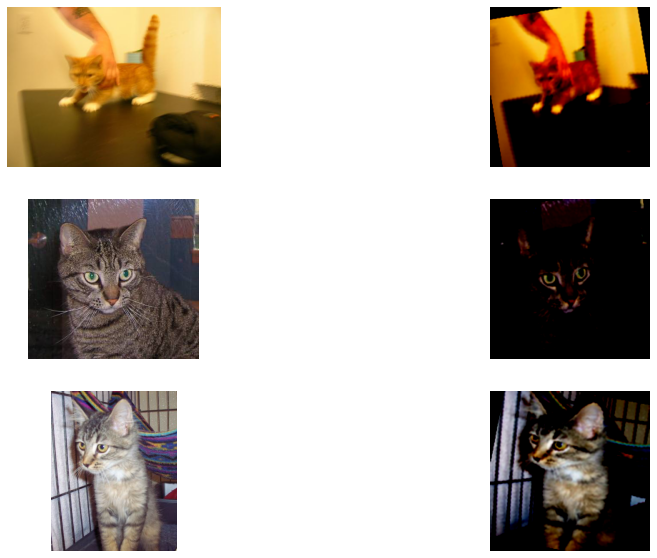

In [5]:
#Printing 3 images of the dataset before and after transforms
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')
ax6.axis('off')

img1 = Image.open('/content/drive/MyDrive/Cat_images/0.jpg')
img1 = np.asarray(img1)
ax1.imshow(img1)
ax2.imshow(np.transpose(my_dataset[0][0].numpy(),(1,2,0)))

img3 = Image.open('/content/drive/MyDrive/Cat_images/1.jpg')
img3 = np.asarray(img3)
ax3.imshow(img3)
ax4.imshow(np.transpose(my_dataset[1][0].numpy(),(1,2,0)))

img5 = Image.open('/content/drive/MyDrive/Cat_images/2.jpg')
img5 = np.asarray(img5)
ax5.imshow(img5)
ax6.imshow(np.transpose(my_dataset[2][0].numpy(),(1,2,0)))

In [6]:
#Wrapping an instance of the custom dataset class in the DataLoader class
my_dataloader = DataLoader(my_dataset, batch_size= 4, shuffle= False, num_workers=2)

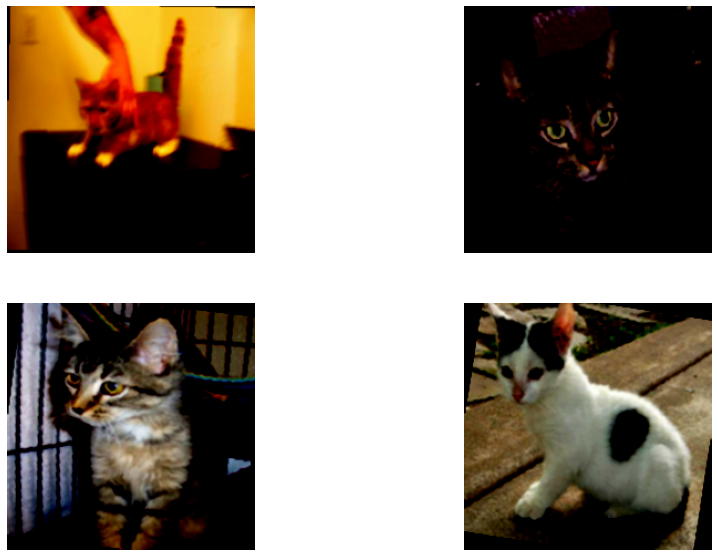

In [7]:
#Plotting the 4 images of a batch together
for i, (img,cls) in enumerate(my_dataloader):
    img0 = img[0]
    img1 = img[1]
    img2 = img[2]
    img3 = img[3]
    
    fig = plt.figure(figsize = (15,10))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    ax4.axis('off')
    
    ax1.imshow(np.transpose(img0.numpy(),(1,2,0)))
    ax2.imshow(np.transpose(img1.numpy(),(1,2,0)))
    ax3.imshow(np.transpose(img2.numpy(),(1,2,0)))
    ax4.imshow(np.transpose(img3.numpy(),(1,2,0)))

    break

In [8]:
#Time needed to load and augment 1000 images using the custom dataset class
st1 = time.time()
for i in range(1000):
    cl = my_dataset[i%10][1]
    
et1 = time.time()
print("Time taken is %f seconds"%(et1-st1) )


Time taken is 22.825076 seconds


In [9]:
#Time needed to load and augment 1000 images using the DataLoader class with different batch sizes and number of workers
workers = [0,1,2]
batch_sizes = [1,4,10,25,100]
for worker in workers:
  for batch_size in batch_sizes:
    temp_dataloader = DataLoader(my_dataset, batch_size=batch_size,shuffle= False,num_workers=worker)
    st2 = time.time()
    for j in range(int(1000/batch_size)):
      for i, (img,cls) in enumerate(temp_dataloader):
        continue    
    et2 = time.time()
    print("For batch size of %d and number of workers = %d, time taken is %f seconds"%(batch_size,worker,et2-st2) )
  print("\n")

For batch size of 1 and number of workers = 0, time taken is 125.854827 seconds
For batch size of 4 and number of workers = 0, time taken is 31.187582 seconds
For batch size of 10 and number of workers = 0, time taken is 12.091074 seconds
For batch size of 25 and number of workers = 0, time taken is 4.992397 seconds
For batch size of 100 and number of workers = 0, time taken is 1.243059 seconds


For batch size of 1 and number of workers = 1, time taken is 191.716542 seconds
For batch size of 4 and number of workers = 1, time taken is 46.429814 seconds
For batch size of 10 and number of workers = 1, time taken is 19.314854 seconds
For batch size of 25 and number of workers = 1, time taken is 8.011915 seconds
For batch size of 100 and number of workers = 1, time taken is 1.927321 seconds


For batch size of 1 and number of workers = 2, time taken is 210.524373 seconds
For batch size of 4 and number of workers = 2, time taken is 52.407943 seconds
For batch size of 10 and number of worker